# 泰坦尼克号数据

问题：
 哪些变量与是否存活有关系
 1. 年龄
 2. 性别


In [141]:
#用到的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
#读取csv文件

titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
#修正数据类型
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

def parse_maybe_float(i):
    if i == '':
        return None
    else:
        return float(i)

In [144]:
#测试
#titanic['Fare'].apply(parse_maybe_float).dtype

In [145]:
titanic['Fare'].apply(parse_maybe_float)
titanic['Age'].apply(parse_maybe_float)
titanic['Parch'].apply(parse_maybe_int)
titanic['Pclass'].apply(parse_maybe_int)
titanic['SibSp'].apply(parse_maybe_int)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
#检查是否有重复姓名
print len(titanic)
print len(titanic['Name'].unique())

891
891


结论：长度相同，所以没有重名

## 探索性别与存活关系

In [147]:
#计算男女分别的总人数
number_of_female_and_male = titanic.groupby('Sex').size()

In [148]:
#计算男女分别的存活人数
survived_number_divided_by_sex = titanic.groupby('Sex').sum()['Survived']
print survived_number_divided_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64


In [149]:
#计算男女存活率
survived_number_divided_by_sex / number_of_female_and_male

Sex
female    0.742038
male      0.188908
dtype: float64

结论：男性存活率更低，可能因为船上的男性都比较绅士，救援时遵从女士优先的原则

## 探索船上人的年龄分布及与存活率的关系

In [150]:
#根据年纪分为老人，小孩，青壮年
def age_classify(age):
    if age <= 15:
        return "Child"
    elif 15 < age <= 55:
        return "Adult"
    elif age > 55:
        return "Older"

titanic["Age"] = titanic["Age"].apply(age_classify).dropna()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S


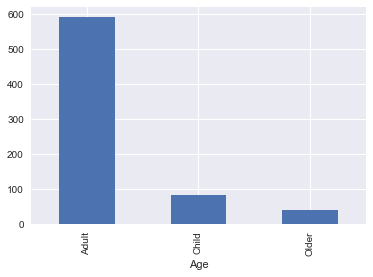

In [151]:
%matplotlib inline
titanic.groupby("Age").size().plot.bar()

结论：大部分都是成年青壮年

In [152]:
titanic.groupby('Age').sum()['Survived'] / titanic.groupby('Age').size()


Age
Adult    0.387479
Child    0.590361
Older    0.300000
dtype: float64

结论：孩子存活率最高。可能因为优先救援小孩。